<a href="https://colab.research.google.com/github/Phuc182219/learn_to_use_colab/blob/main/4s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install quandl

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import numpy as np
from pandas_datareader import data as wb
import quandl

In [ ]:
import numpy as np
import quandl

# Replace with your actual Quandl API key
quandl.ApiConfig.api_key = "gutskENsiQH9anxmH7TU"
# Example: Fetch Apple data from the WIKI database
AAPL = quandl.get("WIKI/AAPL", start_date="2007-01-01", end_date="2024-01-01")
print(AAPL)

              Open    High     Low    Close       Volume  Ex-Dividend  \
Date                                                                    
2007-01-03   86.29   86.58   81.90   83.800   44225700.0          0.0   
2007-01-04   84.05   85.95   83.82   85.660   30259300.0          0.0   
2007-01-05   85.77   86.20   84.40   85.050   29812200.0          0.0   
2007-01-08   85.96   86.53   85.28   85.470   28468100.0          0.0   
2007-01-09   86.45   92.98   85.15   92.570  119617800.0          0.0   
...            ...     ...     ...      ...          ...          ...   
2018-03-21  175.04  175.09  171.26  171.270   35247358.0          0.0   
2018-03-22  170.00  172.68  168.60  168.845   41051076.0          0.0   
2018-03-23  168.39  169.92  164.94  164.940   40248954.0          0.0   
2018-03-26  168.07  173.10  166.44  172.770   36272617.0          0.0   
2018-03-27  173.68  175.15  166.92  168.340   38962839.0          0.0   

            Split Ratio   Adj. Open   Adj. High   

In [ ]:
# Calculate simple returns
AAPL['simple_return'] = (AAPL['Close'] / AAPL['Close'].shift(1)) - 1
print(AAPL['simple_return'])

Date
2007-01-03         NaN
2007-01-04    0.022196
2007-01-05   -0.007121
2007-01-08    0.004938
2007-01-09    0.083070
                ...   
2018-03-21   -0.022655
2018-03-22   -0.014159
2018-03-23   -0.023128
2018-03-26    0.047472
2018-03-27   -0.025641
Name: simple_return, Length: 2826, dtype: float64


In [ ]:
AAPL['log_return'] = np.log(AAPL['Adj. Close'] / AAPL['Adj. Close'].shift(1))
print (AAPL['log_return'])

Date
2007-01-03         NaN
2007-01-04    0.021953
2007-01-05   -0.007147
2007-01-08    0.004926
2007-01-09    0.079800
                ...   
2018-03-21   -0.022915
2018-03-22   -0.014260
2018-03-23   -0.023399
2018-03-26    0.046379
2018-03-27   -0.025975
Name: log_return, Length: 2826, dtype: float64


In [ ]:
import pandas as pd
import quandl
import yfinance as yf

quandl.ApiConfig.api_key = "gutskENsiQH9anxmH7TU"

tickers = ['^DJI', '^GSPC', '^IXIC']
ind_data = pd.DataFrame()

for t in tickers:
    wiki_code = 'YAHOO/' + t  # Construct the Quandl code

    # Try fetching from Quandl first
    try:
        ind_data[t] = quandl.get(wiki_code, start_date='2000-01-01')['Adj Close']

    # If not found on Quandl, try Yahoo Finance
    except quandl.NotFoundError:
        try:
            yf_data = yf.download(t, start='2000-01-01', progress=False)
            ind_data[t] = yf_data['Adj Close']
        except Exception:  # Catch any errors with Yahoo Finance
            print(f"Error fetching data for {t} from both Quandl and Yahoo Finance")



In [ ]:
ind_data.head()

,^DJI,^GSPC,^IXIC
Date,,,
2000-01-03,11357.509766,1455.219971,4131.149902
2000-01-04,10997.929688,1399.420044,3901.689941
2000-01-05,11122.650391,1402.109985,3877.540039
2000-01-06,11253.259766,1403.449951,3727.129883
2000-01-07,11522.559570,1441.469971,3882.620117


In [ ]:
# Define your parameters
tickers = ['AAPL']  # List of stock tickers
start_date = '2018-01-01'
end_date = '2022-04-25'
event_window = (-30, 30)  # Days around the event (adjust as needed)

# Fetch stock data
data = yf.download(tickers, start=start_date, end=end_date)
df = data['Adj Close'].dropna()  # Use adjusted close prices


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Assuming a market index or benchmark
market_index = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate market returns
market_returns = market_index.pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
def calculate_abnormal_returns(df, market_returns):
    # Calculate stock returns
    returns = df.pct_change().dropna()

    # Calculate abnormal returns (excess returns over the market)
    abnormal_returns = returns.sub(market_returns, axis=0)
    return abnormal_returns

abnormal_returns = calculate_abnormal_returns(df, market_returns)
print(abnormal_returns)


            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2020-01-02   NaN   NaN  NaN    NaN        NaN     NaN
2020-01-03   NaN   NaN  NaN    NaN        NaN     NaN
2020-01-06   NaN   NaN  NaN    NaN        NaN     NaN
2020-01-07   NaN   NaN  NaN    NaN        NaN     NaN
2020-01-08   NaN   NaN  NaN    NaN        NaN     NaN
...          ...   ...  ...    ...        ...     ...
2022-12-23   NaN   NaN  NaN    NaN        NaN     NaN
2022-12-27   NaN   NaN  NaN    NaN        NaN     NaN
2022-12-28   NaN   NaN  NaN    NaN        NaN     NaN
2022-12-29   NaN   NaN  NaN    NaN        NaN     NaN
2022-12-30   NaN   NaN  NaN    NaN        NaN     NaN

[756 rows x 6 columns]


In [ ]:
def calculate_caar(abnormal_returns, event_window):
    """Calculates Cumulative Average Abnormal Returns (CAAR).

    Args:
        abnormal_returns (pandas.DataFrame): Abnormal returns.
        event_window (tuple): Start and end days for the event window.

    Returns:
        pandas.Series: CAAR values.
    """

    event_abnormal_returns = abnormal_returns.iloc[event_window[0] : event_window[1] + 1]
    caar = event_abnormal_returns.mean(axis=1).cumsum()
    return caar



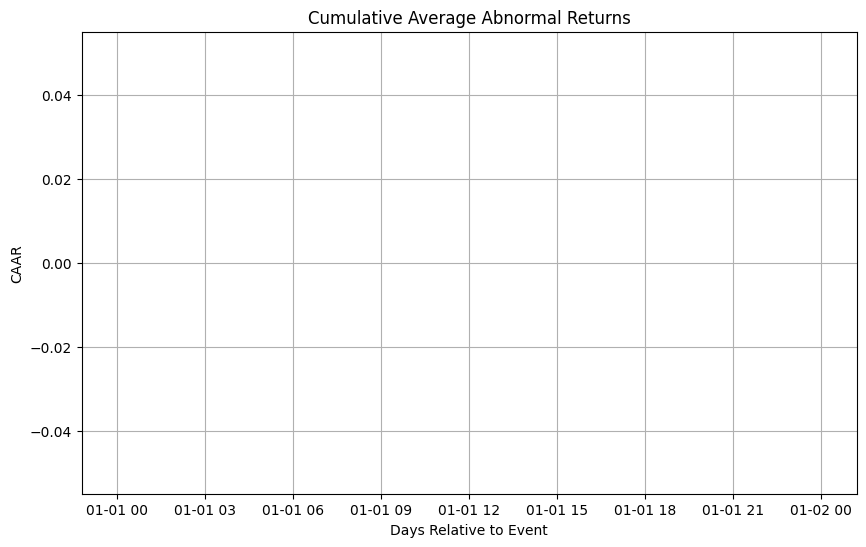

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(caar)
plt.xlabel('Days Relative to Event')
plt.ylabel('CAAR')
plt.title('Cumulative Average Abnormal Returns')
plt.grid()
plt.show()


[*********************100%%**********************]  4 of 4 completed


Series([], dtype: float64)


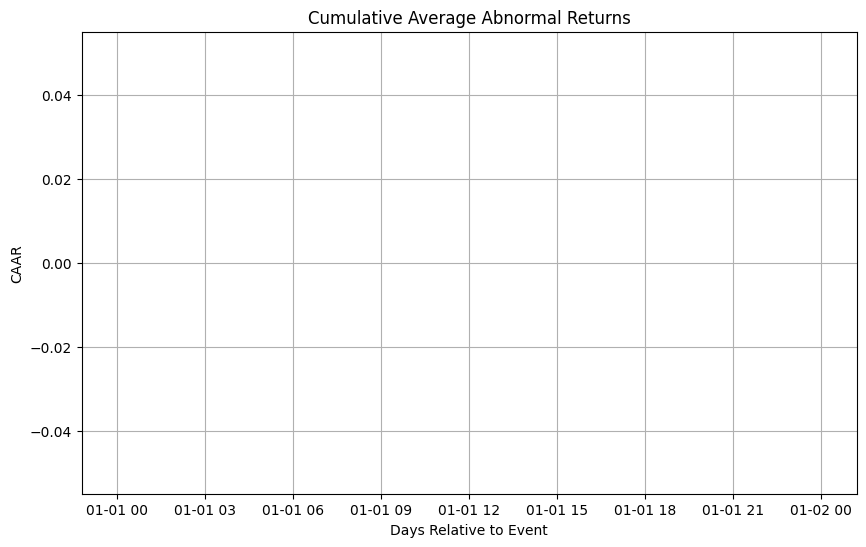

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_abnormal_returns(df, market_returns):
    """Calculates abnormal returns (excess returns over the market).

    Args:
        df (pandas.DataFrame): Stock prices
        market_returns (pandas.Series): Market returns

    Returns:
        pandas.DataFrame: Abnormal returns
    """

    returns = df.pct_change()
    abnormal_returns = returns.sub(market_returns, axis=0)  # Subtract market returns
    return abnormal_returns

def calculate_caar(abnormal_returns, event_window):
    """Calculates Cumulative Average Abnormal Returns (CAAR).

    Args:
        abnormal_returns (pandas.DataFrame): Abnormal returns.
        event_window (tuple): Start and end days for the event window.

    Returns:
        pandas.Series: CAAR values.
    """

    event_abnormal_returns = abnormal_returns.iloc[event_window[0] : event_window[1] + 1]
    caar = event_abnormal_returns.mean(axis=1).cumsum()
    return caar

# --- Main Execution ---

# Parameters
tickers = ['AAPL', 'MSFT', 'GOOG']
start_date = '2023-01-01'
end_date = '2023-04-25'
event_window = (-30, 30)
market_index = '^GSPC'  # S&P 500 as market benchmark

# Fetch data
data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Adj Close']

# Calculate abnormal returns
market_returns = data[market_index].pct_change().dropna()
abnormal_returns = calculate_abnormal_returns(data[tickers], market_returns)

# Calculate CAAR
caar = calculate_caar(abnormal_returns, event_window)
print(caar)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(caar)
plt.xlabel('Days Relative to Event')
plt.ylabel('CAAR')
plt.title('Cumulative Average Abnormal Returns')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


Series([], dtype: float64)


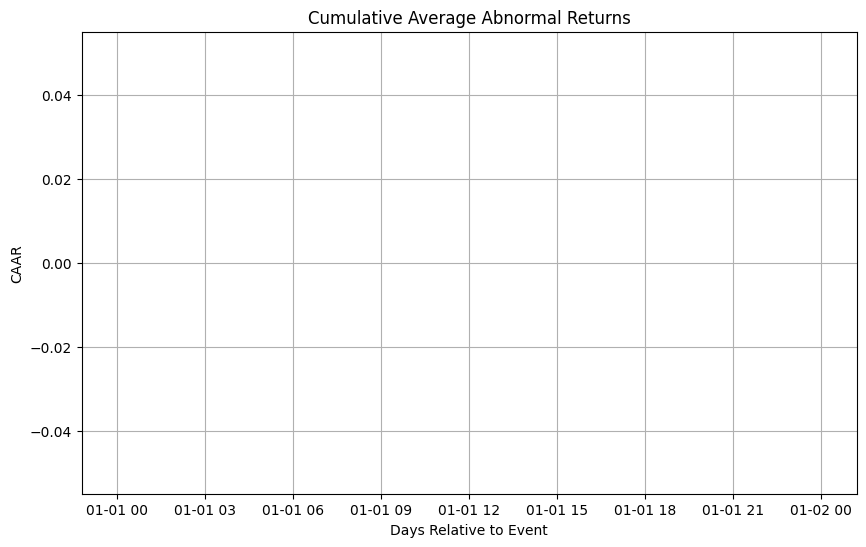

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# --- Data Download and Saving ---

def download_and_save_data(ticker, start_date, end_date, filename):
    """Downloads stock data from Yahoo Finance and saves it to a CSV file."""
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Adj Close'].dropna().to_csv(filename)

# --- Data Loading ---

def load_data(filename):
    """Loads stock data from a CSV file."""
    df = pd.read_csv(filename, index_col='Date', parse_dates=True)
    return df

# --- CAAR Calculations ---

def calculate_abnormal_returns(df, market_returns):
    """Calculates abnormal returns (excess returns over the market)."""
    returns = df.pct_change()
    abnormal_returns = returns.sub(market_returns, axis=0)
    return abnormal_returns

def calculate_caar(abnormal_returns, event_window):
    """Calculates Cumulative Average Abnormal Returns (CAAR)."""
    event_abnormal_returns = abnormal_returns.iloc[event_window[0] : event_window[1] + 1]
    caar = event_abnormal_returns.mean(axis=1).cumsum()
    return caar

# --- Main Execution ---

# Parameters
# ticker = 'AAPL'
# start_date = '2023-01-01'
# end_date = '2023-04-25'
# event_window = (-30, 30)
# market_index = '^GSPC'  # S&P 500 as market benchmark
# data_filename = 'AAPL_data.csv'

# Download and save data (uncomment if you need to download fresh data)
# download_and_save_data(ticker, start_date, end_date, data_filename)

# Load data from CSV
df = load_data(data_filename)

# Calculate abnormal returns
market_returns = calculate_abnormal_returns(yf.download(market_index, start=start_date, end=end_date)['Adj Close'], df)['Adj Close']

abnormal_returns = calculate_abnormal_returns(df, market_returns)

# Calculate CAAR
caar = calculate_caar(abnormal_returns, event_window)
print(caar)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(caar)
plt.xlabel('Days Relative to Event')
plt.ylabel('CAAR')
plt.title('Cumulative Average Abnormal Returns')
plt.grid()
plt.show()



In [ ]:
import yfinance as yf
import datetime as dt

# Read Stock Data from Yahoo Finance
end = dt.datetime(2023, 1, 1)
start = dt.datetime(2020, 1, 1)

df = yf.download("AAPL", start=start, end=end)
df.to_csv('AAPL_data.csv')

# df.from_csv('AAPL.csv')  # Not needed if you just downloaded the data
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.725311,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.043106,77034200


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

def calculate_caar(events, tickers, market_index='^GSPC', event_window=(-30, 30)):
    """Calculates CAAR for a given set of events and multiple tickers.

    Args:
        events (list): List of event dates (datetime objects).
        tickers (list): List of stock ticker symbols.
        market_index (str): Market index for comparison (default: S&P 500).
        event_window (tuple): Days around the event to include (default: -30 to +30).

    Returns:
        pandas.DataFrame: DataFrame containing CAAR values, with tickers as columns.
    """

    all_data = []
    for event_date in events:
        start_date = event_date + pd.Timedelta(days=event_window[0])
        end_date = event_date + pd.Timedelta(days=event_window[1])

        # Fetch data for all tickers and market index
        df = yf.download(tickers + [market_index], start=start_date, end=end_date)['Adj Close']

        # Calculate returns
        returns = df.pct_change()

        # Calculate abnormal returns
        ar = returns.sub(returns[market_index], axis=0)
        ar = ar.drop(columns=market_index)  # Drop the market index column

        # Align with event date
        ar.index = (ar.index - event_date).days
        all_data.append(ar)

    # Combine data for all events
    combined_data = pd.concat(all_data, axis=0)

    # Calculate AAR and CAAR
    aar = combined_data.groupby(combined_data.index).mean()
    caar = aar.cumsum()

    return caar

# Example Usage
events = [pd.to_datetime('2024-01-20'), pd.to_datetime('2024-02-20')]
tickers = ['AAPL', 'VNM.VN']
caar = calculate_caar(events, tickers)
print(caar)




[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed

Ticker      AAPL    VNM.VN
Date                      
-30          NaN       NaN
-29    -0.007207 -0.004610
-28    -0.003476 -0.016316
-27    -0.007772 -0.023036
-26    -0.011250 -0.026419
-25    -0.018967 -0.026726
-24    -0.019879 -0.028156
-23    -0.018023 -0.013712
-22    -0.024893 -0.022646
-21    -0.043539 -0.023538
-20    -0.046790 -0.005937
-19    -0.045943 -0.010968
-18    -0.069051 -0.009043
-17    -0.068522  0.009222
-16    -0.077794  0.012650
-15    -0.074197  0.016332
-14    -0.067876  0.008139
-13    -0.075536 -0.000102
-12    -0.073669 -0.011805
-11    -0.074886 -0.014670
-10    -0.074880 -0.029147
-9     -0.077432 -0.022550
-8     -0.080945 -0.027606
-7     -0.078545 -0.013931
-6     -0.092934 -0.023511
-5     -0.096632 -0.027910
-4     -0.102739 -0.002906
-3     -0.102295 -0.001740
-2     -0.078530 -0.010545
-1     -0.076920  0.003576
 0     -0.075028  0.004018
 1     -0.072107 -0.000044
 2     -0.072062 -0.007393
 3     -0.075387 -0.017610
 4     -0.079683 -0.024330
 

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


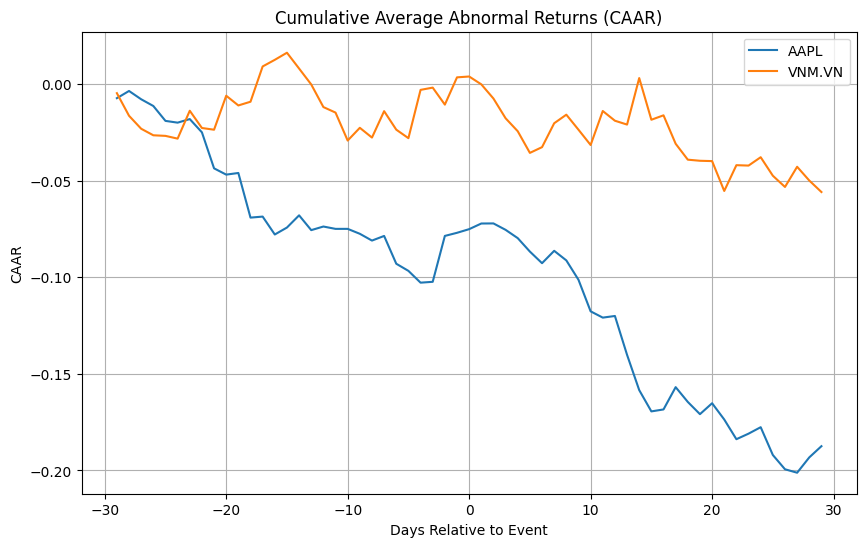

In [ ]:
import matplotlib.pyplot as plt

# Assuming `calculate_caar` is defined as per your function that handles multiple tickers
events = [pd.to_datetime('2024-01-20'), pd.to_datetime('2024-02-20')]
tickers = ['AAPL', 'VNM.VN']  # Include both tickers in the list
caar = calculate_caar(events, tickers)  # Get your existing CAAR calculation

plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(caar[ticker], label=ticker)  # Plot each ticker's CAAR
plt.xlabel('Days Relative to Event')
plt.ylabel('CAAR')
plt.title('Cumulative Average Abnormal Returns (CAAR)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

def tính_toán_caar(sự_kiện, mã_chứng_khoán, chỉ_số_thị_trường='^GSPC', cửa_sổ_sự_kiện=(-30, 30)):
    """Tính toán CAAR cho một tập hợp sự kiện và nhiều mã chứng khoán.

    Args:
        sự_kiện (list): Danh sách ngày sự kiện (đối tượng datetime).
        mã_chứng_khoán (list): Danh sách ký hiệu mã chứng khoán.
        chỉ_số_thị_trường (str): Chỉ số thị trường để so sánh (mặc định: S&P 500).
        cửa_sổ_sự_kiện (tuple): Ngày xung quanh sự kiện để bao gồm (mặc định: -30 đến +30).

    Returns:
        pandas.DataFrame: DataFrame chứa các giá trị CAAR, với các mã chứng khoán là cột.
    """

    tất_cả_dữ_liệu = []
    for ngày_sự_kiện in sự_kiện:
        ngày_bắt_đầu = ngày_sự_kiện + pd.Timedelta(days=cửa_sổ_sự_kiện[0])
        ngày_kết_thúc = ngày_sự_kiện + pd.Timedelta(days=cửa_sổ_sự_kiện[1])

        # Lấy dữ liệu cho tất cả mã chứng khoán và chỉ số thị trường
        df = yf.download(mã_chứng_khoán + [chỉ_số_thị_trường], start=ngày_bắt_đầu, end=ngày_kết_thúc)['Adj Close']

        # Tính toán lợi suất
        lợi_suất = df.pct_change()

        # Tính toán lợi suất bất thường
        ar = lợi_suất.sub(lợi_suất[chỉ_số_thị_trường], axis=0)
        ar = ar.drop(columns=chỉ_số_thị_trường)  # Loại bỏ cột chỉ số thị trường

        # Căn chỉnh với ngày sự kiện
        ar.index = (ar.index - ngày_sự_kiện).days
        tất_cả_dữ_liệu.append(ar)

    # Kết hợp dữ liệu cho tất cả các sự kiện
    dữ_liệu_kết_hợp = pd.concat(tất_cả_dữ_liệu, axis=0)

    # Tính toán AAR và CAAR
    aar = dữ_liệu_kết_hợp.groupby(dữ_liệu_kết_hợp.index).mean()
    caar = aar.cumsum()

    return caar

# Sử dụng ví dụ
sự_kiện = [pd.to_datetime('2024-01-20'), pd.to_datetime('2024-02-20')]
mã_chứng_khoán = ['AAPL', 'VFS']
caar = tính_toán_caar(sự_kiện, mã_chứng_khoán)
print(caar)


[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


Ticker      AAPL       VFS
Date                      
-30          NaN       NaN
-29    -0.007207 -0.016457
-28    -0.003476 -0.022625
-27    -0.007772 -0.060896
-26    -0.014729 -0.030623
-25    -0.022445 -0.022714
-24    -0.023358 -0.012211
-23    -0.021502  0.006287
-22    -0.028372  0.002607
-21    -0.047017 -0.014796
-20    -0.050269 -0.007024
-19    -0.049422 -0.022879
-18    -0.072530 -0.121950
-17    -0.072001 -0.109679
-16    -0.081273 -0.107663
-15    -0.077676 -0.149854
-14    -0.071354 -0.129394
-13    -0.079015 -0.145057
-12    -0.077147 -0.172519
-11    -0.078364 -0.190611
-10    -0.078359 -0.185750
-9     -0.080910 -0.179127
-8     -0.084423 -0.181126
-7     -0.082023 -0.210362
-6     -0.096413 -0.202398
-5     -0.103809 -0.167989
-4     -0.109915 -0.203448
-3     -0.109472 -0.240949
-2     -0.085706 -0.272284
-1     -0.082487 -0.220768
 0     -0.080595 -0.260550
 1     -0.077673 -0.252218
 2     -0.077628 -0.267653
 3     -0.080954 -0.272880
 4     -0.085249 -0.311151
 

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


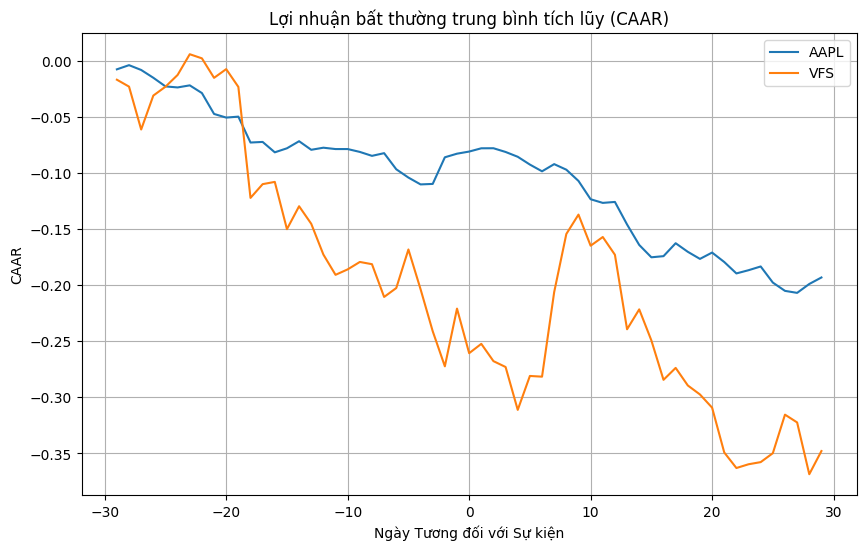

In [ ]:
import matplotlib.pyplot as plt

sự_kiện = [pd.to_datetime('2024-01-20'), pd.to_datetime('2024-02-20')]
mã_chứng_khoán = ['AAPL', 'VFS']  # Bao gồm cả hai mã chứng khoán trong danh sách
caar = tính_toán_caar(sự_kiện, mã_chứng_khoán)  # Lấy kết quả tính toán CAAR hiện có

plt.figure(figsize=(10, 6))
for mã_chứng_khoán in mã_chứng_khoán:
    plt.plot(caar[mã_chứng_khoán], label=mã_chứng_khoán)  # Vẽ biểu đồ CAAR cho từng mã chứng khoán
plt.xlabel('Ngày Tương đối với Sự kiện')
plt.ylabel('CAAR')
plt.title('Lợi nhuận bất thường trung bình tích lũy (CAAR)')
plt.legend()
plt.grid()
plt.show()
